## Vector Autoregressions and Granger Causality

In [1]:
# 导入需要的包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR

### Example 13.1

Example 12.1建立了ARDL模型，将d_r20看作内源变量，将d_rs看作外源变量。但很重要的一点是我们并不知道这个假设是否合理，由于这二者分别反映了英国的金边市场和债券市场，因此它们很有可能相互作用，并不只是一个变量作用于另一个。因此有必要对它们的相互作用进行研究，首先我们确定它们二者构成的VAR的阶数。

In [31]:
r20=pd.read_csv("r20.csv")
rs=pd.read_csv("rs.csv")
d_r20=r20['r20'].diff().dropna(axis=0,how='any')
d_rs=rs['rs'].diff().dropna(axis=0,how='any')    # 差分

In [55]:
data=pd.DataFrame(d_r20)
data=data.rename(columns={'r20':'d_r20'})
data['d_rs']=d_rs
model=VAR(data)   # VAR建模
orderRes=model.select_order()
orderRes.summary()    # 选择阶数

D:\anaconda3\envs\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,AIC,BIC,FPE,HQIC
0,-4.262,-4.250,0.01409,-4.257
1,-4.417,-4.381*,0.01207,-4.403*
2,-4.423*,-4.362,0.01200*,-4.400
3,-4.415,-4.330,0.01210,-4.382
4,-4.406,-4.297,0.01220,-4.364
5,-4.400,-4.267,0.01227,-4.349
6,-4.391,-4.233,0.01239,-4.330
7,-4.387,-4.205,0.01244,-4.316
8,-4.387,-4.181,0.01243,-4.308
9,-4.383,-4.152,0.01249,-4.294


AIC和FPE表明我们应该选择VAR(2),然而BIC和HQIC表明我们应该选择VAR(1).实际上，VAR(1)模型拟合数据之后得到的d_20的数据的残差具有平方显著相关，因此VAR(2)是更为合理的模型。

In [56]:
# 构建VAR(2)模型
res=model.fit(maxlags=2)
res.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 15, Aug, 2020
Time:                     15:28:08
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -4.40535
Nobs:                     783.000    HQIC:                  -4.44200
Log likelihood:          -464.049    FPE:                  0.0115058
AIC:                     -4.46490    Det(Omega_mle):       0.0113603
--------------------------------------------------------------------
Results for equation d_r20
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           -0.002764         0.009987           -0.277           0.782
L1.d_r20         0.313223         0.039881            7.854           0.000
L1.d_rs         -0.011915         0.026072           -0.457           0.648
L2.d

由于我们不知道d_r20和d_rs是如何相互作用的，即不知道哪个是因，哪个是果，因此需要进行Granger 因果性检验：

In [63]:
print(res.test_causality('d_rs','d_r20',kind='f'))
print(res.test_causality('d_r20','d_rs',kind='f'))

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: d_r20 does not Granger-cause d_rs: reject at 5% significance level. Test statistic: 10.418, critical value: 3.002>, p-value: 0.000>
<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: d_rs does not Granger-cause d_r20: fail to reject at 5% significance level. Test statistic: 0.413, critical value: 3.002>, p-value: 0.662>


从最后的p值可以看出，r20会Granger影响rs,但是rs不会Granger影响r20。因此金边证券市场的行为有助于预测债券市场的价格。

### Example 13.2

首先画出正交化的脉冲响应，下图分别是d_20对d_rs的响应和d_rs对d_r20的响应。

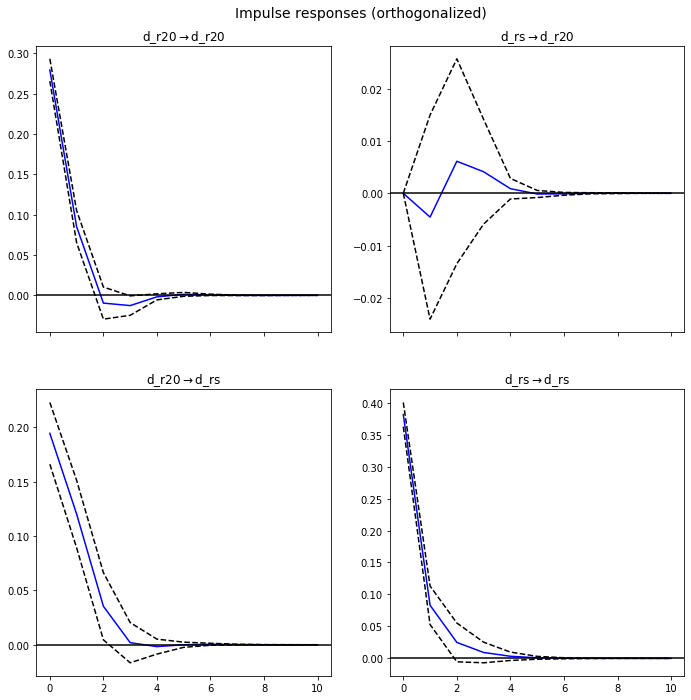

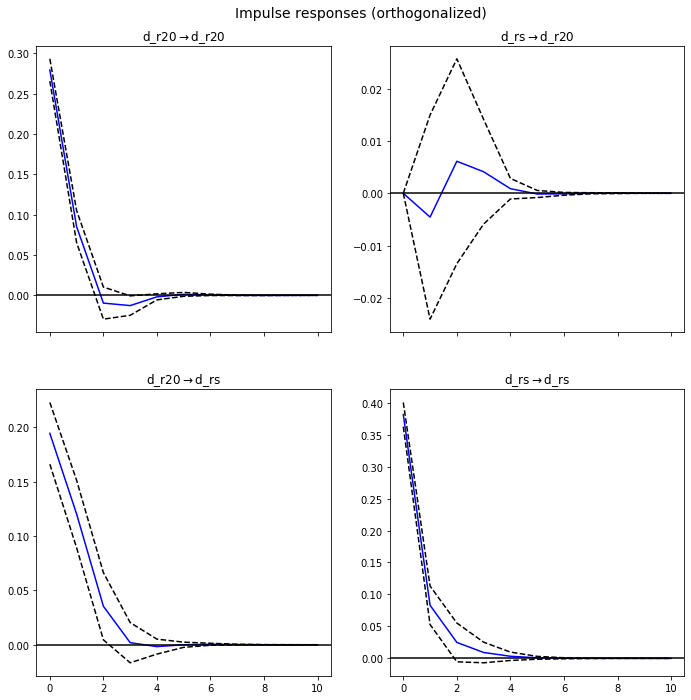

In [77]:
irf = res.irf(10)
irf.plot(orth=True)

可以看出，d_r20->d_rs和d_rs->d_r20的响应具有很大的差异，说明了噪声在同一时刻的相关性可以改变冲击响应。

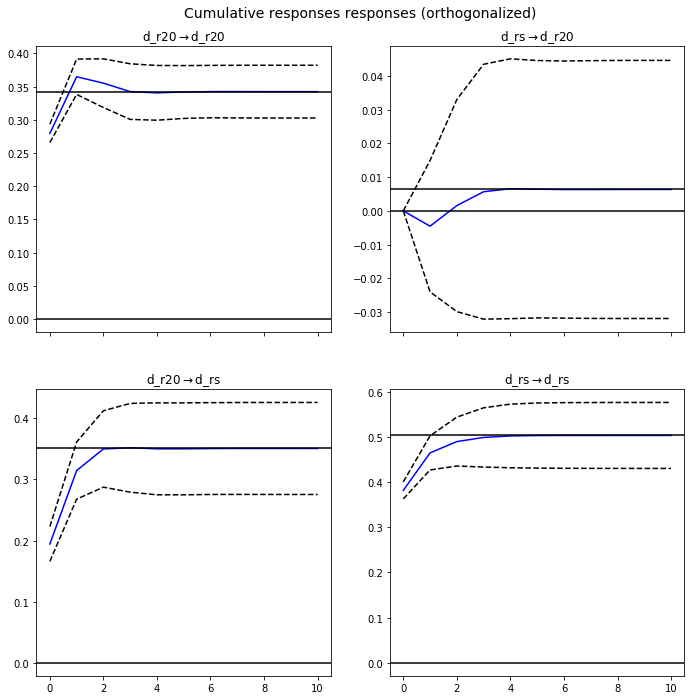

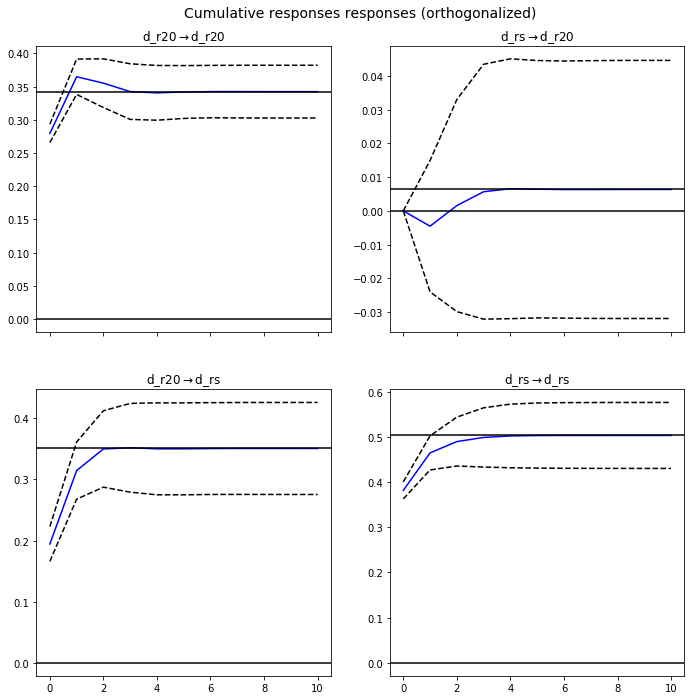

In [76]:
irf.plot_cum_effects(orth=True)

可以看出，累积响应最终收敛到了一个正值。

同样可以画出未正交化的响应：

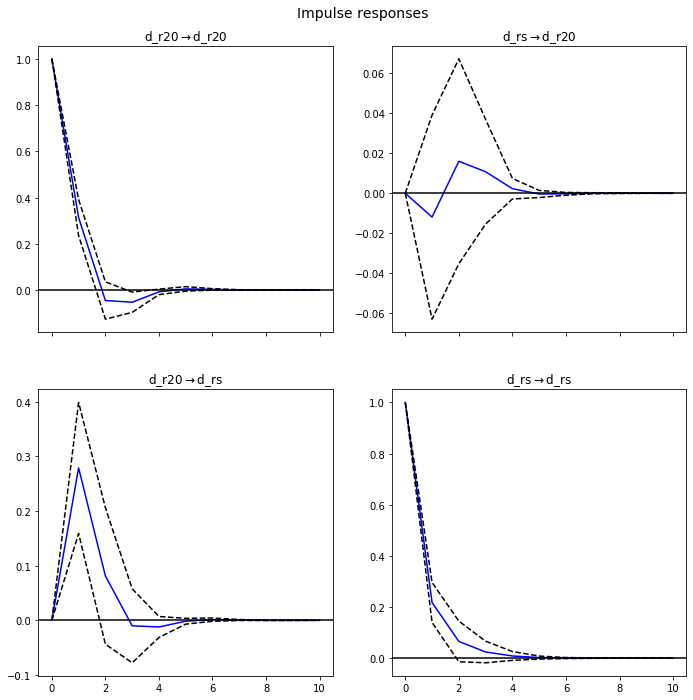

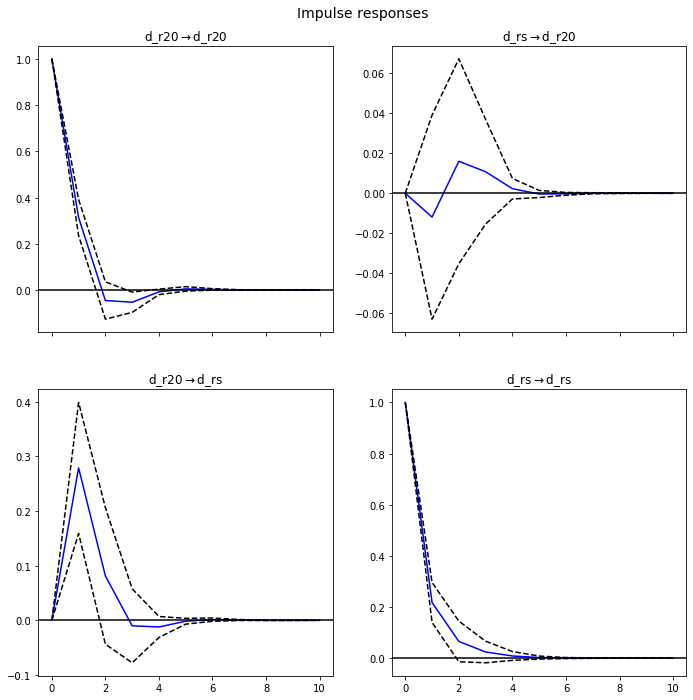

In [75]:
irf.plot(orth=False)

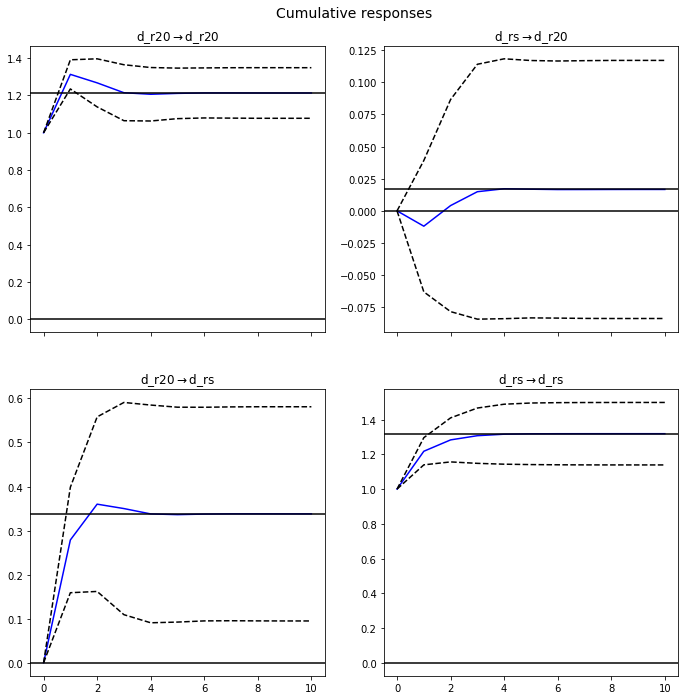

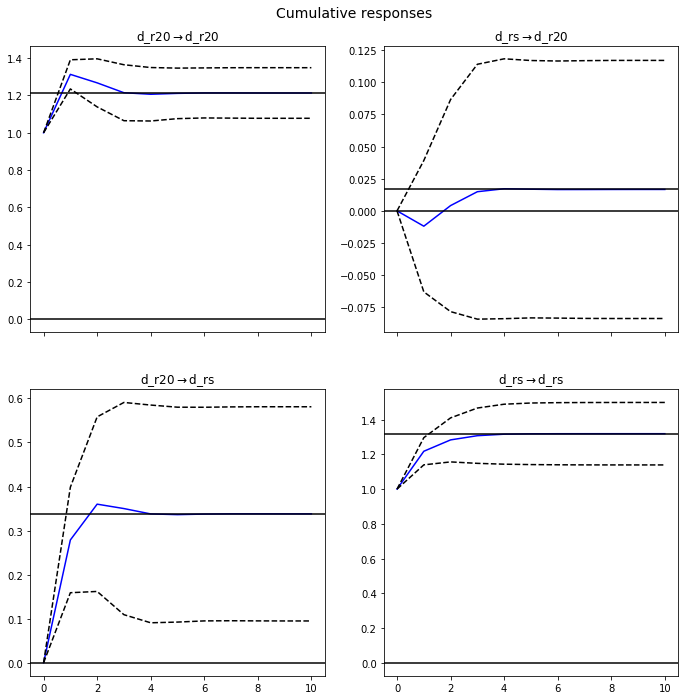

In [74]:
irf.plot_cum_effects(orth=False)